# Polynomial Regression

Polynomial Regression is a regression algorithm that models the relationship between a dependent(y) and independent variable(x) as nth degree polynomial. 

\begin{align}
y= b0+b1x1+ b2x1^2+ b2x1^3+...... bnx1^n
\end{align}

1) It is also called the special case of Multiple Linear Regression in ML. Because we add some polynomial terms to the Multiple Linear regression equation to convert it into Polynomial Regression.

2) It is a linear model with some modification in order to increase the accuracy.

3) The dataset used in Polynomial regression for training is of non-linear nature.

4) It makes use of a linear regression model to fit the complicated and non-linear functions and datasets.

5) Hence, "In Polynomial regression, the original features are converted into Polynomial features of required degree (2,3,..,n) and then modeled using a linear model."

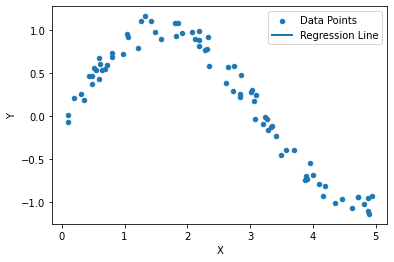

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from matplotlib.animation import FuncAnimation

# Generate random data
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Polynomial regression degree
degree = 15

# Create polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

# Initialize the linear regression model
model = LinearRegression()

# Create a figure and axis for plotting
fig, ax = plt.subplots()
ax.scatter(X, y, s=20, label='Data Points')
line, = ax.plot([], [], lw=2, label='Regression Line')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend(loc='upper right')

# Function to initialize the plot
def init():
    line.set_data([], [])
    return line,

# Function to update the plot in each animation frame
def update(frame):
    model.fit(X_poly[:frame + 1], y[:frame + 1])
    x_plot = np.linspace(0, 5, 1000)
    y_plot = model.predict(poly_features.transform(x_plot.reshape(-1, 1)))
    line.set_data(x_plot, y_plot)
    return line,

# Create the animation
ani = FuncAnimation(fig, update, frames=len(X), init_func=init, blit=True)

# Show the animation
plt.show()

In [2]:
from IPython import display

video = ani.to_html5_video()
html_code = display.HTML(video)
display.display(html_code)

# ===========================XXXXX===========================
# ===========================XXXXX===========================
# Real Worl Problem Description

There is a Human Resource company, which is going to hire a new candidate. The candidate has told his previous salary 160K per annum, and the HR have to check whether he is telling the truth or bluff. So to identify this, they only have a dataset of his previous company in which the salaries of the top 10 positions are mentioned with their levels. By checking the dataset available, we have found that there is a non-linear relationship between the Position levels and the salaries. Our goal is to build a Bluffing detector regression model, so HR can hire an honest candidate.

## =============================Steps=====================================
The main steps involved in Polynomial Regression are given below:

1) Data Pre-processing

2) Build a Linear Regression model and fit it to the dataset

3) Build a Polynomial Regression model and fit it to the dataset

4) Visualize the result for Linear Regression and Polynomial Regression model

5) Predicting the output

In [3]:
import pandas as pd
import numpy as nm  
import matplotlib.pyplot as mtp  

# Create a dictionary with the data
data = {
    'position': [
        'Business analyst',
        'Junior consultant',
        'Senior consultant',
        'Manager',
        'Country manager',
        'Regional manager',
        'Partner',
        'Senior partner',
        'C-level',
        'CEO'
    ],
    'level': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'salary': [40000, 50000, 60000, 80000, 110000, 150000, 200000, 300000, 500000, 1000000]
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

            position  level   salary
0   Business analyst      1    40000
1  Junior consultant      2    50000
2  Senior consultant      3    60000
3            Manager      4    80000
4    Country manager      5   110000
5   Regional manager      6   150000
6            Partner      7   200000
7     Senior partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [4]:
#Extracting Independent and dependent Variable  
x= df.iloc[:, 1:2].values  
y= df.iloc[:, 2].values  

In [5]:
#Fitting the Linear Regression to the dataset  
from sklearn.linear_model import LinearRegression  
lin_regs= LinearRegression()  
lin_regs.fit(x,y)  

LinearRegression()

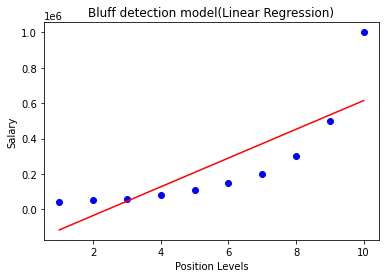

In [6]:
#Visulaizing the result for Linear Regression model  
mtp.scatter(x,y,color="blue")  
mtp.plot(x,lin_regs.predict(x), color="red")  
mtp.title("Bluff detection model(Linear Regression)")  
mtp.xlabel("Position Levels")  
mtp.ylabel("Salary")  
mtp.show()

In [8]:
 #Fitting the Polynomial regression to the dataset  
from sklearn.preprocessing import PolynomialFeatures  
poly_regs= PolynomialFeatures(degree= 2)  
x_poly= poly_regs.fit_transform(x)  
lin_reg_2 =LinearRegression()  
lin_reg_2.fit(x_poly, y)  

LinearRegression()

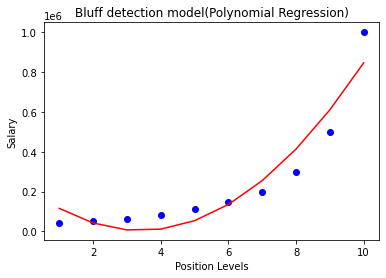

In [9]:
#Visulaizing the result for Polynomial Regression  
mtp.scatter(x,y,color="blue")  
mtp.plot(x, lin_reg_2.predict(poly_regs.fit_transform(x)), color="red")  
mtp.title("Bluff detection model(Polynomial Regression)")  
mtp.xlabel("Position Levels")  
mtp.ylabel("Salary")  
mtp.show()  

In [10]:
lin_pred = lin_regs.predict([[6.5]])  
print(lin_pred)  

[330151.51515152]


In [11]:
poly_pred = lin_reg_2.predict(poly_regs.fit_transform([[6.5]]))  
print(poly_pred)  

[190094.6969697]
